In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
Long_Covid_data = pd.read_csv('/content/gdrive/MyDrive/Long_Covid_dataset/host_train.csv')

In [4]:
Long_Covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   case_id                            25000 non-null  int64  
 1   Hospital                           25000 non-null  int64  
 2   Hospital_type                      25000 non-null  int64  
 3   Hospital_city                      25000 non-null  int64  
 4   Hospital_region                    25000 non-null  int64  
 5   Available_Extra_Rooms_in_Hospital  25000 non-null  int64  
 6   Department                         25000 non-null  object 
 7   Ward_Type                          25000 non-null  object 
 8   Ward_Facility                      25000 non-null  object 
 9   Bed_Grade                          24996 non-null  float64
 10  patientid                          25000 non-null  int64  
 11  City_Code_Patient                  24750 non-null  flo

In [5]:
Long_Covid_data['Illness_Severity'].unique()

array(['Extreme', 'Moderate', 'Minor'], dtype=object)

In [6]:
Long_Covid_data.describe()

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Patient_Visitors,Admission_Deposit
count,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,24996.000000,25000.000000,24750.000000,25000.000000,25000.000000
mean,12500.500000,18.812280,1.332480,4.77092,0.785680,3.104200,2.663306,65331.823920,7.021535,3.247760,4980.715440
std,7217.022701,8.632382,1.567812,3.16322,0.743834,1.141663,0.857299,37885.136227,4.278515,1.761323,1052.846063
min,1.000000,1.000000,0.000000,1.00000,0.000000,0.000000,1.000000,70.000000,1.000000,0.000000,1820.000000
25%,6250.750000,11.000000,0.000000,2.00000,0.000000,2.000000,2.000000,32629.000000,4.000000,2.000000,4307.000000
50%,12500.500000,21.000000,1.000000,5.00000,1.000000,3.000000,3.000000,64405.000000,8.000000,3.000000,4855.000000
75%,18750.250000,26.000000,2.000000,7.00000,1.000000,4.000000,3.000000,98023.500000,8.000000,4.000000,5495.000000
max,25000.000000,32.000000,6.000000,13.00000,2.000000,12.000000,4.000000,131595.000000,34.000000,24.000000,10999.000000


In [7]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [8]:
# Encode labels in column 'species'.
Long_Covid_data['Illness_Severity']= label_encoder.fit_transform(Long_Covid_data['Illness_Severity'])
Long_Covid_data['Illness_Severity'].unique()

array([0, 2, 1])

In [9]:
Long_Covid_data['Type of Admission'] = label_encoder.fit_transform(Long_Covid_data['Type of Admission'])
Long_Covid_data['Type of Admission'].unique()

array([0, 1, 2])

In [10]:
Long_Covid_data['Department'] = label_encoder.fit_transform(Long_Covid_data['Department'])
Long_Covid_data['Department'].unique()

array([3, 1, 2, 0, 4])

In [11]:
Long_Covid_data['Stay_Days'].unique()

array(['0-10', '41-50', '31-40', 'Nov-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [12]:
rep_num_cylinders = {"0-10":0, "11-20":0, "21-30":0,"Nov-20":0,
                     "31-40":0, "41-50":1, "51-60":1,
                     "61-70":1, "71-80":1, "81-90":1,
                     "91-100":1,"More than 100 Days":1}

Long_Covid_data["Stay_Days"].replace(rep_num_cylinders, inplace=True)

In [13]:
Long_Covid_data['Stay_Days'].unique()

array([0, 1])

In [14]:
Long_Covid_data['Age'].unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       'Nov-20', '0-10', '91-100'], dtype=object)

In [15]:
rep_num_cylinders = {"Nov-20":0,"0-10":1, "11-20":2, "21-30":3,
                     "31-40":4, "41-50":5, "51-60":6,
                     "61-70":7, "71-80":8, "81-90":9,
                     "91-100":10}

Long_Covid_data["Age"].replace(rep_num_cylinders, inplace=True)

In [16]:
Long_Covid_data['Age'].unique()

array([ 6,  8,  4,  5,  9,  7,  3,  0,  1, 10])

In [17]:
Long_Covid_data['Ward_Type'] = label_encoder.fit_transform(Long_Covid_data['Ward_Type'])
Long_Covid_data['Ward_Type'].unique()

array([2, 3, 1, 0, 4])

In [18]:
Long_Covid_data['Ward_Facility'] = label_encoder.fit_transform(Long_Covid_data['Ward_Facility'])
Long_Covid_data['Ward_Facility'].unique()

array([5, 4, 3, 1, 0, 2])

In [19]:
Long_Covid_data.isna().sum()

case_id                                0
Hospital                               0
Hospital_type                          0
Hospital_city                          0
Hospital_region                        0
Available_Extra_Rooms_in_Hospital      0
Department                             0
Ward_Type                              0
Ward_Facility                          0
Bed_Grade                              4
patientid                              0
City_Code_Patient                    250
Type of Admission                      0
Illness_Severity                       0
Patient_Visitors                       0
Age                                    0
Admission_Deposit                      0
Stay_Days                              0
dtype: int64

In [20]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Specify the column(s) you want to impute
columns_to_impute = ['Bed_Grade', 'City_Code_Patient']

# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the column(s) to calculate the imputation value(s)
imputer.fit(Long_Covid_data[columns_to_impute])

# Transform and impute the missing values in the specified column(s)
Long_Covid_data[columns_to_impute] = imputer.transform(Long_Covid_data[columns_to_impute])

In [21]:
Long_Covid_data.isna().sum()

case_id                              0
Hospital                             0
Hospital_type                        0
Hospital_city                        0
Hospital_region                      0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility                        0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Illness_Severity                     0
Patient_Visitors                     0
Age                                  0
Admission_Deposit                    0
Stay_Days                            0
dtype: int64

In [22]:
Data_after_Droping_Columns = Long_Covid_data.drop(['Available_Extra_Rooms_in_Hospital','patientid','case_id'], axis = 1)

In [23]:
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [24]:
Selected_Columns = Data_after_Droping_Columns[['Hospital','Hospital_type','Hospital_city','Bed_Grade','City_Code_Patient','Hospital_region','Department','Type of Admission','Illness_Severity','Patient_Visitors','Age','Admission_Deposit']]
labels = Data_after_Droping_Columns['Stay_Days']

Class=0, n=18657 (74.628%)
Class=1, n=6343 (25.372%)


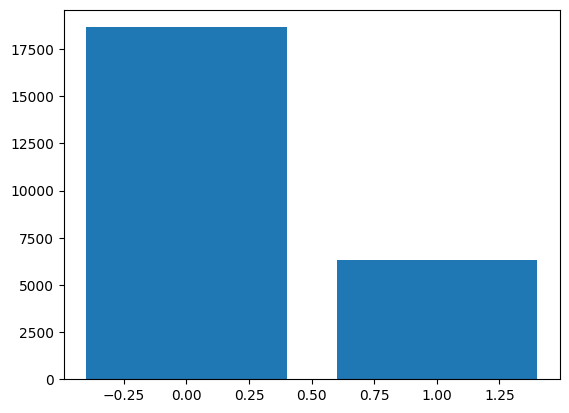

In [25]:
# summarize distribution
counter = Counter(labels)
for k,v in counter.items():
 per = v / len(labels) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [26]:
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [27]:
oversample = SMOTE()
Selected_Columns, labels = oversample.fit_resample(Selected_Columns, labels)
# summarize distribution
counter = Counter(labels)
for k,v in counter.items():
 per = v / len(labels) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=18657 (50.000%)
Class=1, n=18657 (50.000%)


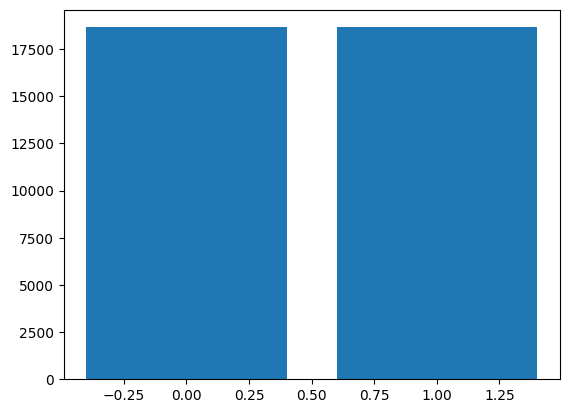

In [28]:
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [29]:
num_features = len(Data_after_Droping_Columns.columns)
num_rows = (num_features + 4) // 5  # Calculate the number of rows needed for the subplot grid
num_cols = min(num_features, 5)  # Maximum 5 columns in the subplot grid

In [30]:
Selected_Columns_df = pd.DataFrame(Selected_Columns)
labels_df = pd.DataFrame(labels)

# Concatenate the two DataFrames along the columns axis (axis=1)
Final_Data = pd.concat([Selected_Columns_df, labels_df], axis=1)

In [31]:
Final_Data.head()

,Hospital,Hospital_type,Hospital_city,Bed_Grade,City_Code_Patient,Hospital_region,Department,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,8,2,3,2.0,7.0,2,3,0,0,2,6,4911,0
1,2,2,5,2.0,7.0,2,3,1,0,2,6,5954,1
2,10,4,1,2.0,7.0,0,1,1,0,2,6,4745,0
3,26,1,2,2.0,7.0,1,3,1,0,2,6,7272,1
4,26,1,2,2.0,7.0,1,3,1,0,2,6,5558,1


<Axes: xlabel='Department', ylabel='Count'>

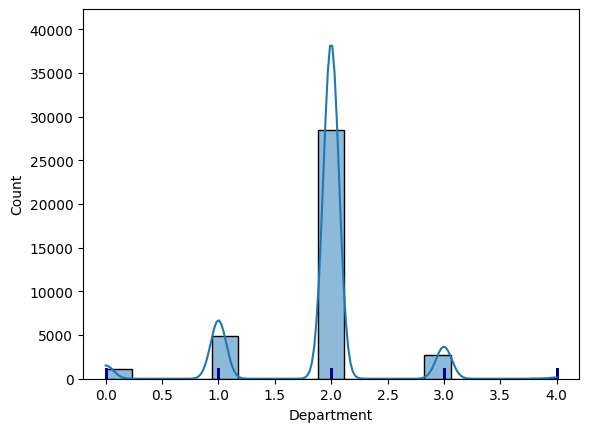

In [32]:
sns.rugplot(x='Department', data=Final_Data, height=.03, color='darkblue')
sns.histplot(x='Department', data=Final_Data, kde=True)

<Axes: xlabel='Type of Admission', ylabel='Count'>

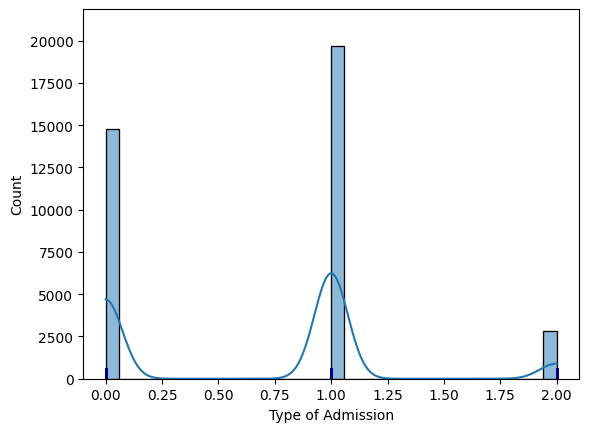

In [33]:
sns.rugplot(x='Type of Admission', data=Final_Data, height=.03, color='darkblue')
sns.histplot(x='Type of Admission', data=Final_Data, kde=True)

<Axes: xlabel='Illness_Severity', ylabel='Count'>

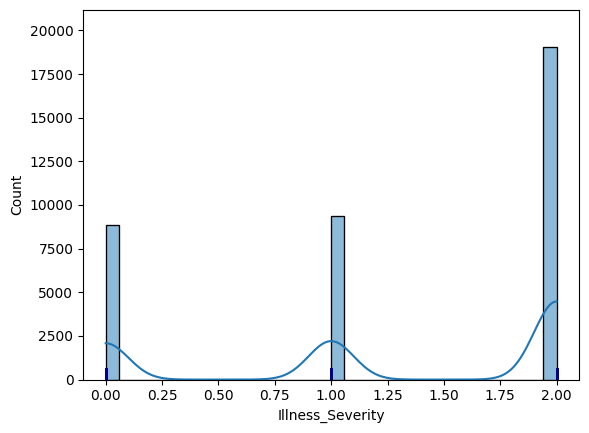

In [34]:
sns.rugplot(x='Illness_Severity', data=Final_Data, height=.03, color='darkblue')
sns.histplot(x='Illness_Severity', data=Final_Data, kde=True)

<Axes: xlabel='Stay_Days', ylabel='Count'>

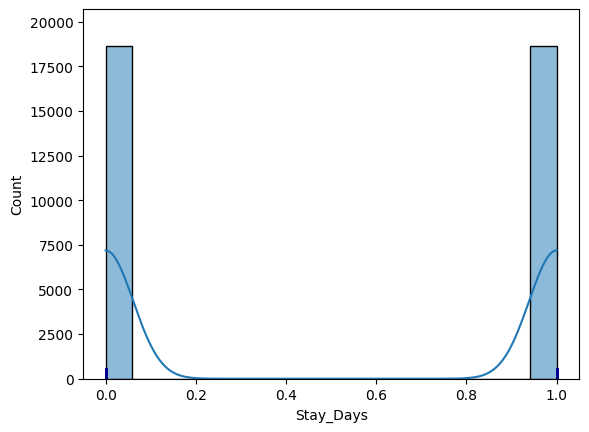

In [35]:
sns.rugplot(x='Stay_Days', data=Final_Data, height=.03, color='darkblue')
sns.histplot(x='Stay_Days', data=Final_Data, kde=True)

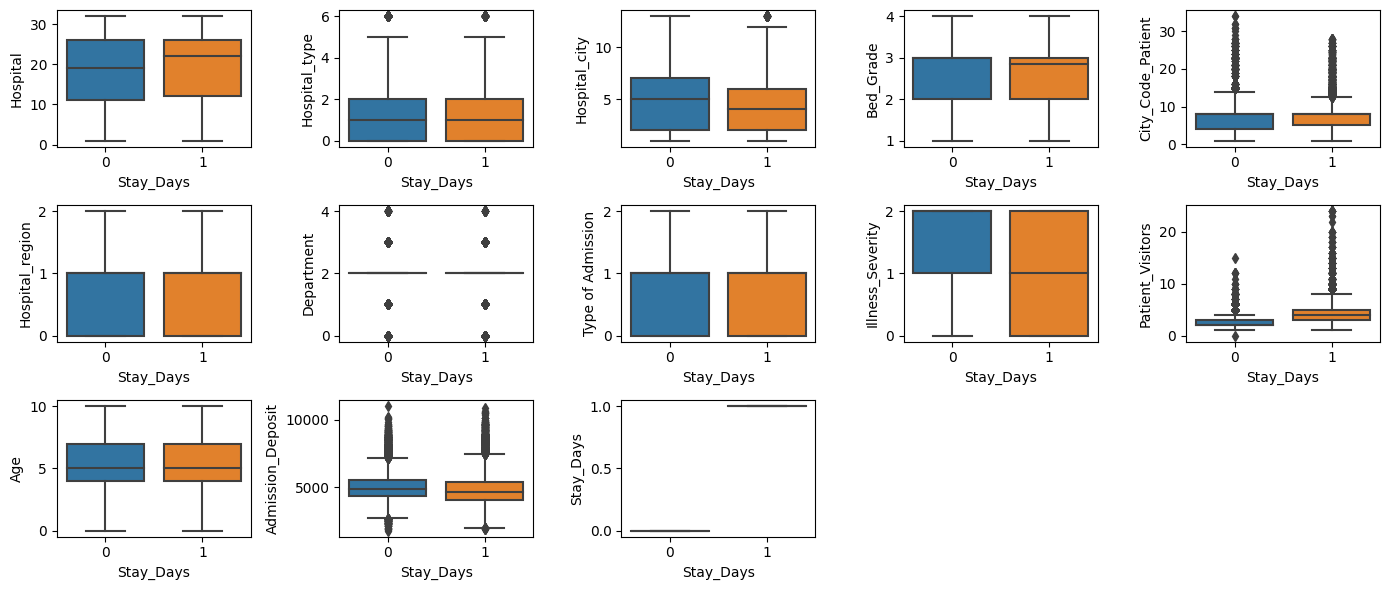

In [36]:
# Boxplots for each feature grouped by class
plt.figure(figsize=(14, 2*num_rows))
for i, feature in enumerate(Final_Data.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x='Stay_Days', y=feature, data=Final_Data)
plt.tight_layout()
plt.show()

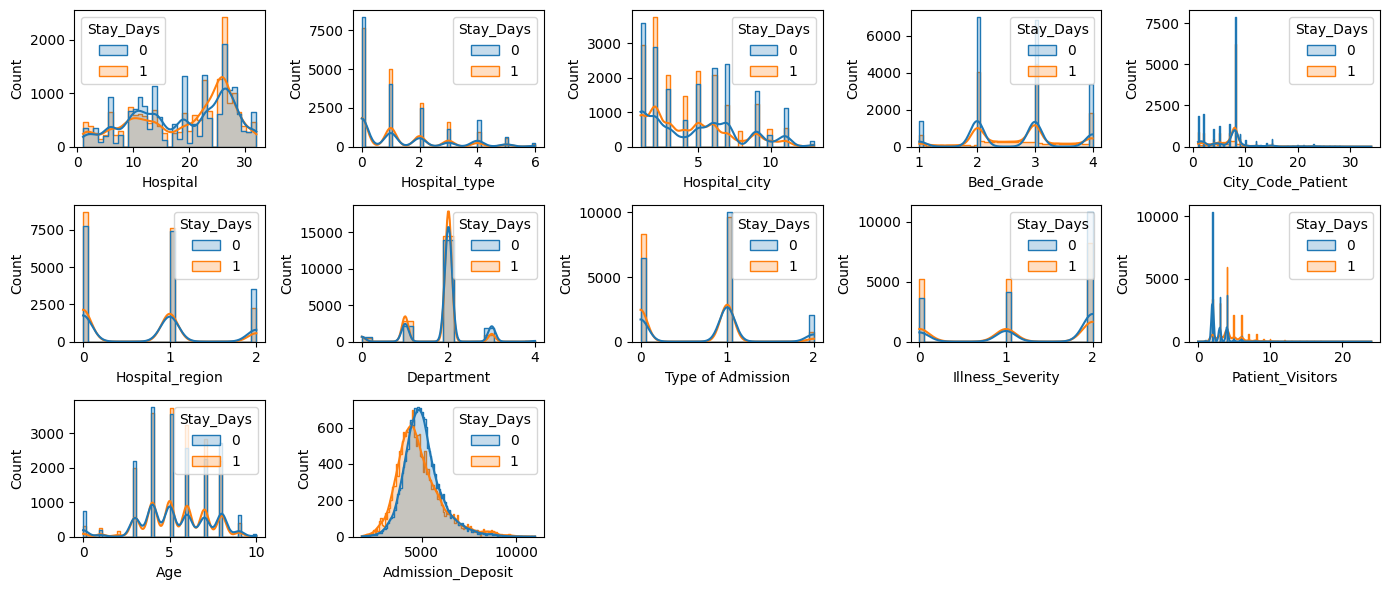

In [37]:
lis=list(Final_Data.columns)
# Histograms for each feature grouped by class
plt.figure(figsize=(14, 2*num_rows))
for i, feature in enumerate(lis[:-1]):
    plt.subplot(num_rows, num_cols, i+1)
    sns.histplot(data=Final_Data, x=feature, hue='Stay_Days', element='step', kde=True)
plt.tight_layout()
plt.show()

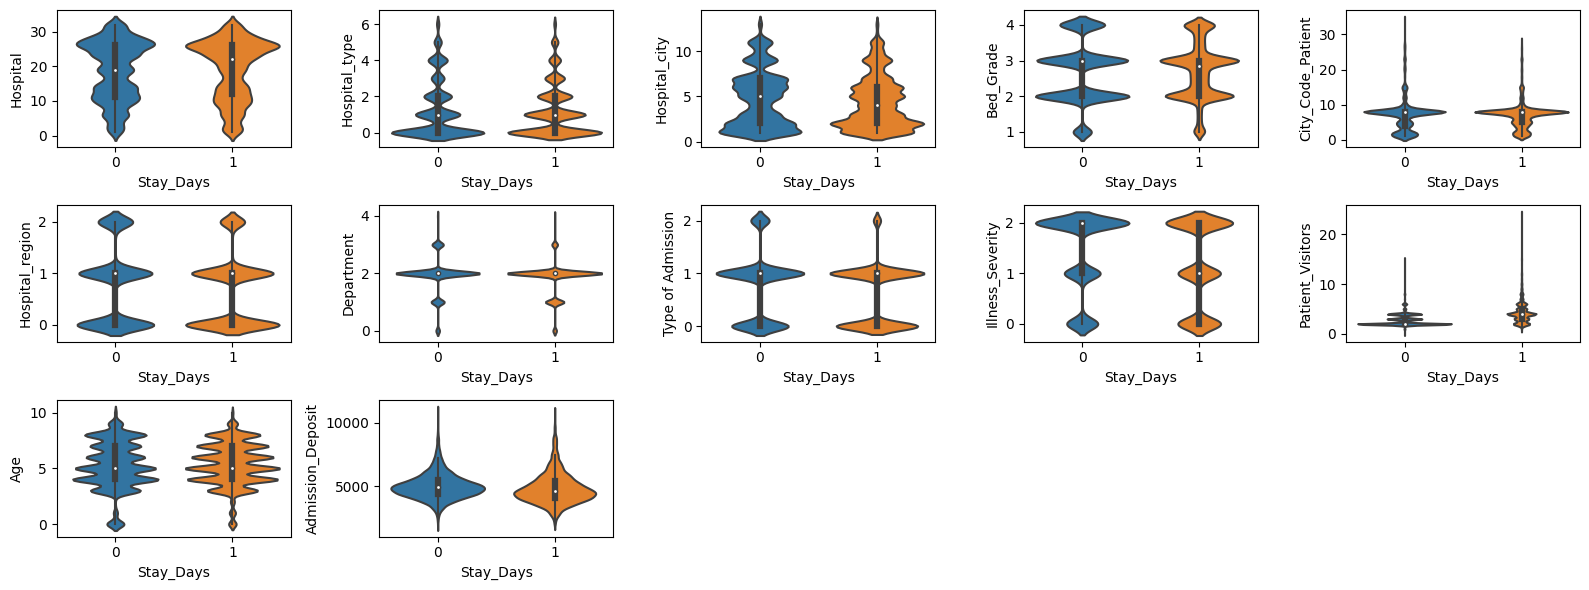

In [38]:
# Violin plots for each feature grouped by class
plt.figure(figsize=(16, 2*num_rows))
for i, feature in enumerate(lis[:-1]):
    plt.subplot(num_rows, num_cols, i+1)
    sns.violinplot(x='Stay_Days', y=feature, data=Final_Data)
plt.tight_layout()
plt.show()

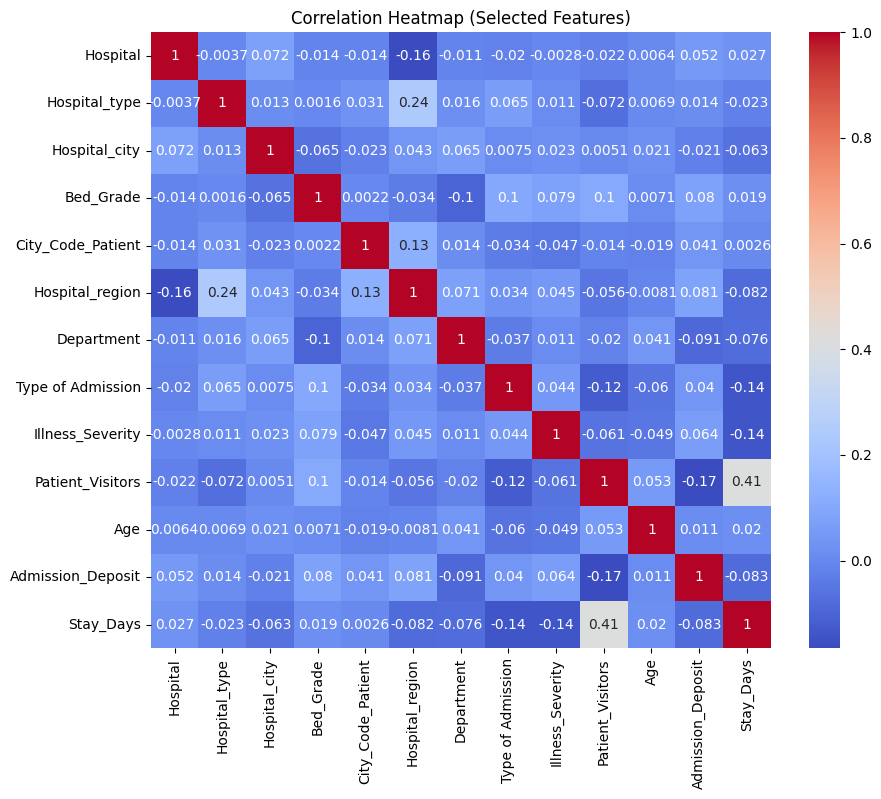

In [39]:
# Correlation Heatmap (with selected features):
plt.figure(figsize=(10, 8))
sns.heatmap(Final_Data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Selected Features)')
plt.show()

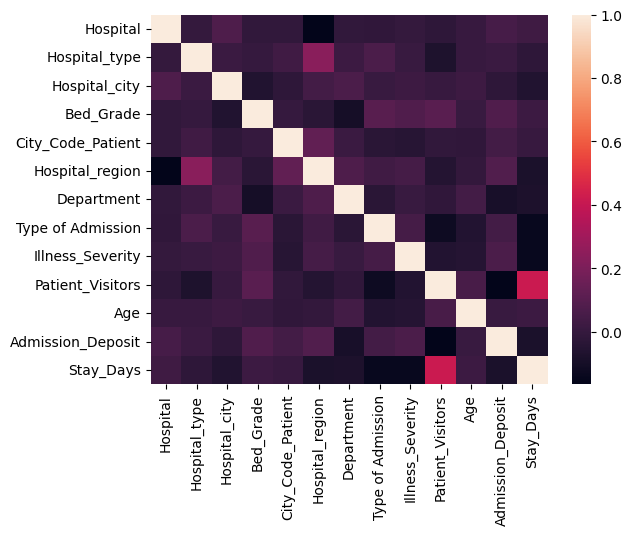

In [40]:
#creates a heatmap of the correlation matrix of the DataFrame
import seaborn as sns
sns.heatmap(Final_Data.corr());

In [41]:
Selected_Columns = Final_Data[['Hospital','Hospital_type','Hospital_city','Bed_Grade','City_Code_Patient','Hospital_region','Department','Type of Admission','Illness_Severity','Patient_Visitors','Age','Admission_Deposit']]
labels = Final_Data['Stay_Days']

In [42]:
Final_Data.shape

(37314, 13)

In [43]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [44]:
X = Selected_Columns
y = labels
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

                Specs         Score
11  Admission_Deposit  63166.017659
9    Patient_Visitors   6225.319907
7   Type of Admission    398.785393
8    Illness_Severity    390.721597
2       Hospital_city    298.790751
5     Hospital_region    179.921227
0            Hospital    103.026897
6          Department     37.339827
1       Hospital_type     33.115023
10                Age     10.972768
3           Bed_Grade      3.427459
4   City_Code_Patient      0.539221


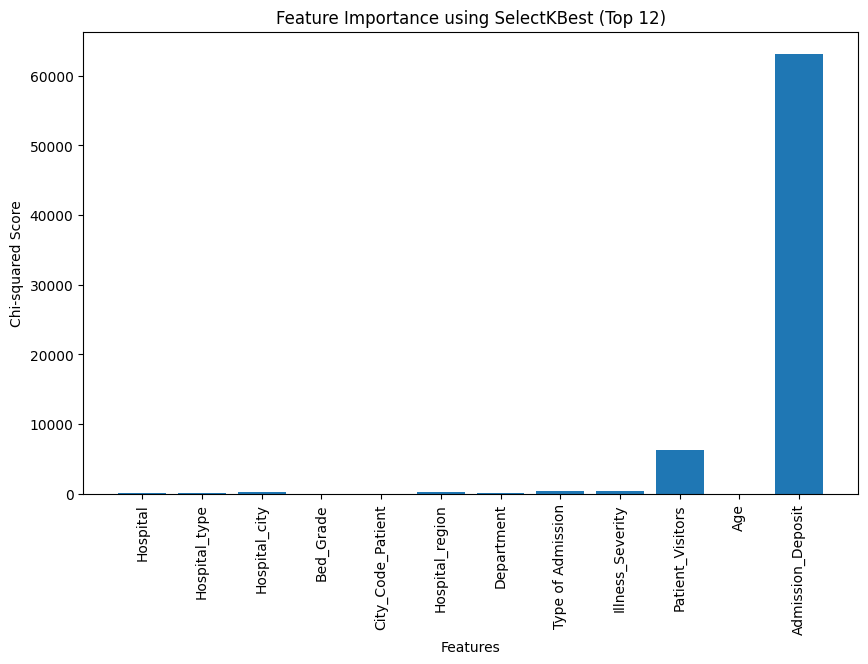

In [45]:
# Plot the feature scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(featureScores['Specs'])), featureScores['Score'])
plt.xticks(range(len(featureScores['Specs'])), featureScores['Specs'], rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Chi-squared Score')
plt.title('Feature Importance using SelectKBest (Top 12)')
plt.show()

In [46]:
Data_Columns_to_Normalize = Final_Data[['Admission_Deposit','Patient_Visitors','Hospital_type','Age','Hospital','City_Code_Patient','Illness_Severity','Hospital_region','Bed_Grade','Patient_Visitors','Department']]
Outcome = Final_Data['Stay_Days']

In [47]:
import pandas as pd
from sklearn import preprocessing

Data_for_Normilize = preprocessing.normalize(Data_Columns_to_Normalize, axis=0)

Scaled_Data_set = pd.DataFrame(Data_for_Normilize, columns=Data_Columns_to_Normalize.columns)

In [48]:
Scaled_Data_set.head(5)

,Admission_Deposit,Patient_Visitors,Hospital_type,Age,Hospital,City_Code_Patient,Illness_Severity,Hospital_region,Bed_Grade,Patient_Visitors,Department
0,0.005025,0.002586,0.005350,0.00547,0.001996,0.004507,0.0,0.010236,0.003708,0.002586,0.007884
1,0.006092,0.002586,0.005350,0.00547,0.000499,0.004507,0.0,0.010236,0.003708,0.002586,0.007884
2,0.004855,0.002586,0.010699,0.00547,0.002495,0.004507,0.0,0.000000,0.003708,0.002586,0.002628
3,0.007441,0.002586,0.002675,0.00547,0.006488,0.004507,0.0,0.005118,0.003708,0.002586,0.007884
4,0.005687,0.002586,0.002675,0.00547,0.006488,0.004507,0.0,0.005118,0.003708,0.002586,0.007884


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Scaled_Data_set, Outcome, test_size=0.2, random_state=42)

In [50]:
from sklearn.svm import SVC
from sklearn import metrics

In [51]:
# train the model on train set
SVM_model = SVC(kernel ="poly",decision_function_shape="ovr")
SVM_model.fit(X_train, y_train)

# print prediction results
predictions = SVM_model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      3796
           1       0.74      0.75      0.74      3667

    accuracy                           0.74      7463
   macro avg       0.74      0.74      0.74      7463
weighted avg       0.74      0.74      0.74      7463



In [52]:
# Make the predictions
SVM_Model_Prediction = SVM_model.predict(X_test)

# Measure the performance
print("Accuracy score %.2f" %metrics.accuracy_score(y_test, SVM_Model_Prediction))

Accuracy score 0.74


In [53]:
# Print the confusion matrix
SVM_Confusion_mat = confusion_matrix(y_test, SVM_Model_Prediction)
print("Confusion Matrix:")
print(SVM_Confusion_mat)

Confusion Matrix:
[[2813  983]
 [ 935 2732]]


In [54]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

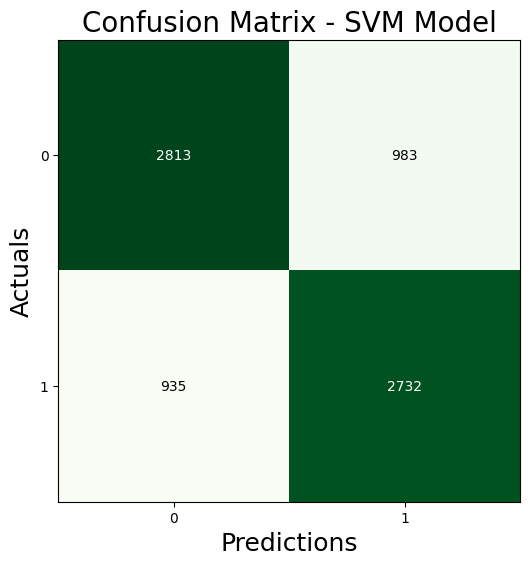

In [55]:
# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=SVM_Confusion_mat, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - SVM Model', fontsize=20)
plt.show()

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [57]:
KNN_Model = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
KNN_Model.fit(X_train, y_train)

# print prediction results
KNN_Model_Prediction = KNN_Model.predict(X_test)
print(classification_report(y_test, KNN_Model_Prediction))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      3796
           1       0.75      0.76      0.75      3667

    accuracy                           0.76      7463
   macro avg       0.76      0.76      0.76      7463
weighted avg       0.76      0.76      0.76      7463



In [58]:
# Measure the performance
print("Accuracy score %.2f" %metrics.accuracy_score(y_test, KNN_Model_Prediction))

Accuracy score 0.76


In [59]:
# Print the confusion matrix
KNN_Confusion_mat = confusion_matrix(y_test, KNN_Model_Prediction)
print("Confusion Matrix:")
print(KNN_Confusion_mat)

Confusion Matrix:
[[2856  940]
 [ 887 2780]]


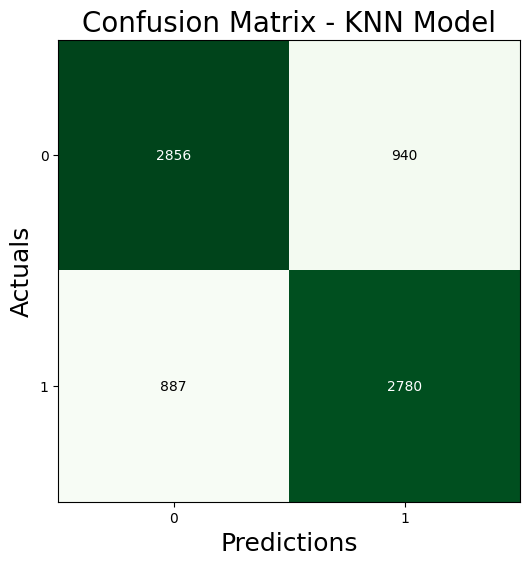

In [60]:
# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=KNN_Confusion_mat, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - KNN Model', fontsize=20)
plt.show()

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [62]:
Logist_model = LogisticRegression()

# Fit the model on the training data
Logist_model.fit(X_train, y_train)

# Make predictions on the test data
Logist_model_pred = Logist_model.predict(X_test)

# Print classification report
print(classification_report(y_test, Logist_model_pred))


              precision    recall  f1-score   support

           0       0.70      0.73      0.71      3796
           1       0.70      0.67      0.69      3667

    accuracy                           0.70      7463
   macro avg       0.70      0.70      0.70      7463
weighted avg       0.70      0.70      0.70      7463



In [63]:
# Measure the performance
print("Accuracy score %.2f" %metrics.accuracy_score(y_test, Logist_model_pred))

Accuracy score 0.70


In [64]:
# Print the confusion matrix
Logistic_Confusion_mat = confusion_matrix(y_test, Logist_model_pred)
print("Confusion Matrix:")
print(Logistic_Confusion_mat)

Confusion Matrix:
[[2758 1038]
 [1192 2475]]


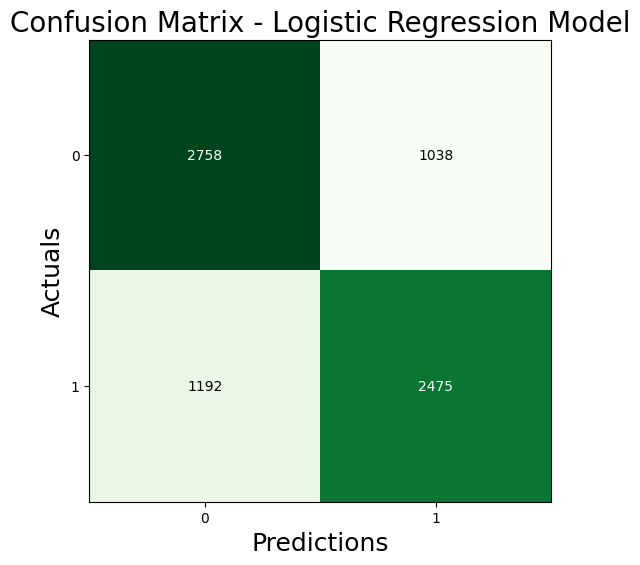

In [65]:
# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=Logistic_Confusion_mat, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - Logistic Regression Model', fontsize=20)
plt.show()

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [67]:
Tunning_model_Logistic = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# define search
search = GridSearchCV(Tunning_model_Logistic, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)

In [68]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7125166129823038
Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
Decision_Tree_model = DecisionTreeClassifier(random_state=0)

# Fit the model on the training data
Decision_Tree_model.fit(X_train, y_train)

# Make predictions on the test data
Decision_Tree_pred = Decision_Tree_model.predict(X_test)

# Print classification report
print(classification_report(y_test, Decision_Tree_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      3796
           1       0.78      0.80      0.79      3667

    accuracy                           0.79      7463
   macro avg       0.79      0.79      0.79      7463
weighted avg       0.79      0.79      0.79      7463



In [71]:
# Measure the performance
print("Accuracy score %.2f" %metrics.accuracy_score(y_test, Decision_Tree_pred))

Accuracy score 0.79


In [72]:
# Print the confusion matrix
Decision_tree_Confusion_mat = confusion_matrix(y_test, Decision_Tree_pred)
print("Confusion Matrix:")
print(Decision_tree_Confusion_mat)

Confusion Matrix:
[[2961  835]
 [ 721 2946]]


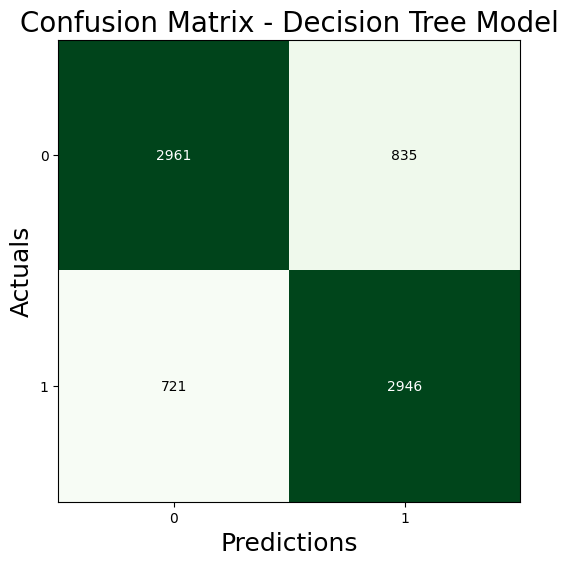

In [73]:
# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=Decision_tree_Confusion_mat, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - Decision Tree Model', fontsize=20)
plt.show()

In [74]:
from sklearn.naive_bayes import GaussianNB

In [75]:
# Create a Naive Bayes classifier (Gaussian Naive Bayes for continuous features)
Naive_Bayes_model = GaussianNB()

# Fit the model on the training data
Naive_Bayes_model.fit(X_train, y_train)

# Make predictions on the test data
Naive_Bayes_pred = Naive_Bayes_model.predict(X_test)

In [76]:
# Print classification report
print(classification_report(y_test, Naive_Bayes_pred))

              precision    recall  f1-score   support

           0       0.66      0.87      0.75      3796
           1       0.80      0.53      0.64      3667

    accuracy                           0.70      7463
   macro avg       0.73      0.70      0.69      7463
weighted avg       0.72      0.70      0.69      7463



In [77]:
# Measure the performance
print("Accuracy score %.2f" %metrics.accuracy_score(y_test, Naive_Bayes_pred))

Accuracy score 0.70


In [78]:
# Print the confusion matrix
Naive_Bayes_Confusion_mat = confusion_matrix(y_test, Naive_Bayes_pred)
print("Confusion Matrix:")
print(Naive_Bayes_Confusion_mat)

Confusion Matrix:
[[3295  501]
 [1723 1944]]


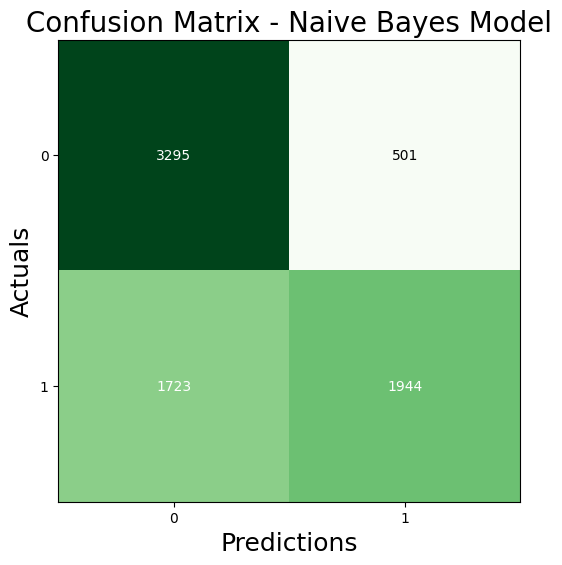

In [79]:
# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=Naive_Bayes_Confusion_mat, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - Naive Bayes Model', fontsize=20)
plt.show()

In [80]:
import xgboost as xgb

In [81]:
Gd_B_Model = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds (trees)
    max_depth=3,       # Maximum depth of each tree
    learning_rate=0.1,  # Step size shrinkage for boosting
    objective='binary:logistic',  # Binary classification objective function
    random_state=42
)

# Train the model
Gd_B_Model.fit(np.array(X_train), y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [82]:
# Make predictions on the test set
Gd_B_Pred = Gd_B_Model.predict(X_test)

# You can also get more detailed metrics using classification_report
gd_B_Acc_Report = classification_report(y_test, Gd_B_Pred)
print("Classification Report:\n", gd_B_Acc_Report)


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84      3796
           1       0.86      0.78      0.82      3667

    accuracy                           0.83      7463
   macro avg       0.83      0.83      0.83      7463
weighted avg       0.83      0.83      0.83      7463



In [83]:
# Measure the performance
# Evaluate the model
print("Accuracy score %.2f" %metrics.accuracy_score(y_test, Gd_B_Pred))

Accuracy score 0.83


In [84]:
# Print the confusion matrix
Gd_B_Mat = confusion_matrix(y_test, Gd_B_Pred)
print("Confusion Matrix:")
print(Gd_B_Mat)

Confusion Matrix:
[[3330  466]
 [ 791 2876]]


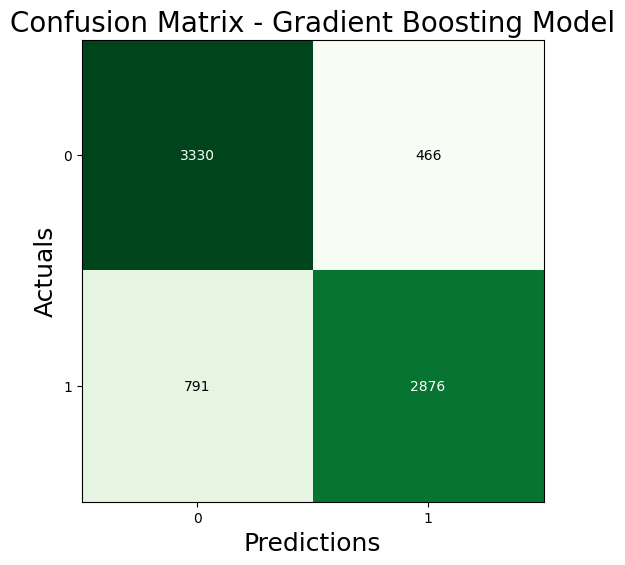

In [85]:
# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=Gd_B_Mat, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - Gradient Boosting Model', fontsize=20)
plt.show()

In [86]:
# Make predictions using the 5 models
Pred_Model_1 = SVM_Model_Prediction   # Assuming SVM_Model_Prediction contains predicted probabilities
Pred_Model_2 = Decision_Tree_model.predict_proba(X_test)[:, 1]
Pred_Model_3 = KNN_Model_Prediction   # Assuming KNN_Model_Prediction contains predicted labels (not probabilities)
Pred_Model_4 = Logist_model.predict_proba(X_test)[:, 1]
Pred_Model_5 = Naive_Bayes_model.predict_proba(X_test)[:, 1]
Pred_Model_6 = Gd_B_Model.predict_proba(X_test)[:, 1]

In [87]:
# Average the predicted probabilities of all models to create an ensemble
Ensemble_Pred = (Pred_Model_1 + Pred_Model_2 + Pred_Model_3 + Pred_Model_4 + Pred_Model_5 + Pred_Model_6) / 6

# Ensure the ensemble predictions lie between 0 and 1
Ensemble_Pred = np.clip(Ensemble_Pred, 0, 1)

# Convert the averaged probabilities to binary class labels (0 or 1)
Ensemble_Pred_Binary = np.round(Ensemble_Pred)

# Calculate the accuracy of the ensemble model
Ensemble_Accuracy = accuracy_score(y_test, Ensemble_Pred_Binary)
print(f"Ensemble Model Accuracy: {Ensemble_Accuracy:.3f}")

Ensemble Model Accuracy: 0.809


In [88]:
# Calculate the accuracy of each individual model
Model_1_Accuracy = accuracy_score(y_test, np.round(Pred_Model_1))
Model_2_Accuracy = accuracy_score(y_test, np.round(Pred_Model_2))
Model_3_Accuracy = accuracy_score(y_test, Pred_Model_3)
Model_4_Accuracy = accuracy_score(y_test, np.round(Pred_Model_4))
Model_5_Accuracy = accuracy_score(y_test, np.round(Pred_Model_5))
Model_6_Accuracy = accuracy_score(y_test, np.round(Pred_Model_6))
# Find the model with the best accuracy
Best_Accuracy_Model = np.argmax([Model_1_Accuracy, Model_2_Accuracy, Model_3_Accuracy, Model_4_Accuracy, Model_5_Accuracy,Model_6_Accuracy, Ensemble_Accuracy])
Best_Accuracy_Value = max([Model_1_Accuracy, Model_2_Accuracy, Model_3_Accuracy, Model_4_Accuracy, Model_5_Accuracy,Model_6_Accuracy, Ensemble_Accuracy])

In [89]:
# Print the results
print(f"Model 1 SVM Accuracy: {Model_1_Accuracy:.3f}")
print(f"Model 2 Decision Tree Accuracy: {Model_2_Accuracy:.3f}")
print(f"Model 3 KNN Accuracy: {Model_3_Accuracy:.3f}")
print(f"Model 4 Logist Regression Accuracy: {Model_4_Accuracy:.3f}")
print(f"Model 5 Naive Bayes Accuracy: {Model_5_Accuracy:.3f}")
print(f"Model 6 Gradient Boosting Accuracy: {Model_6_Accuracy:.3f}")
print(f"Ensemble Model Accuracy: {Ensemble_Accuracy:.3f}")

print(f"Best Accuracy Model: Model {Best_Accuracy_Model + 1}, Accuracy: {Best_Accuracy_Value:.3f}")

Model 1 SVM Accuracy: 0.743
Model 2 Decision Tree Accuracy: 0.792
Model 3 KNN Accuracy: 0.755
Model 4 Logist Regression Accuracy: 0.701
Model 5 Naive Bayes Accuracy: 0.702
Model 6 Gradient Boosting Accuracy: 0.832
Ensemble Model Accuracy: 0.809
Best Accuracy Model: Model 6, Accuracy: 0.832


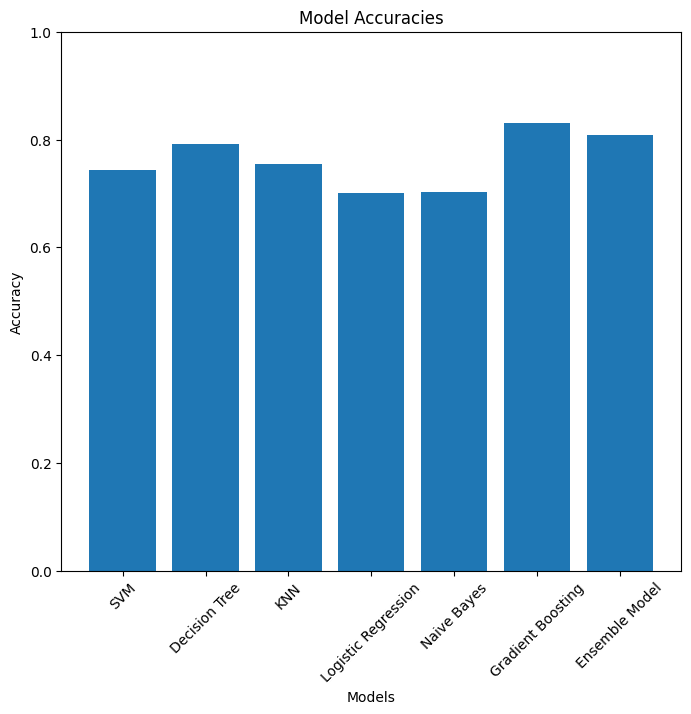

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have calculated the accuracies
model_accuracies = [Model_1_Accuracy, Model_2_Accuracy, Model_3_Accuracy, Model_4_Accuracy, Model_5_Accuracy,Model_6_Accuracy,Ensemble_Accuracy]

# Models' names
model_names = ['SVM', 'Decision Tree', 'KNN', 'Logistic Regression', 'Naive Bayes','Gradient Boosting', 'Ensemble Model']

# Create a bar plot
plt.figure(figsize=(8, 7))
plt.bar(model_names, model_accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to be between 0 and 1
plt.title('Model Accuracies')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import tensorflow as tf
from tensorflow.keras import layers, models

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
# Standardize the input features (optional, but recommended for better convergence)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [129]:
# Create the CNN model
CNN_model = Sequential()
CNN_model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
CNN_model.add(MaxPooling1D(2))
CNN_model.add(Conv1D(64, 3, activation='relu'))
CNN_model.add(MaxPooling1D(2))
CNN_model.add(Flatten())
CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(Dense(1, activation='sigmoid'))

In [130]:
CNN_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 9, 32)             128       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 4, 32)            0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 2, 64)             6208      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 128)              

In [131]:
from tensorflow.keras.utils import plot_model

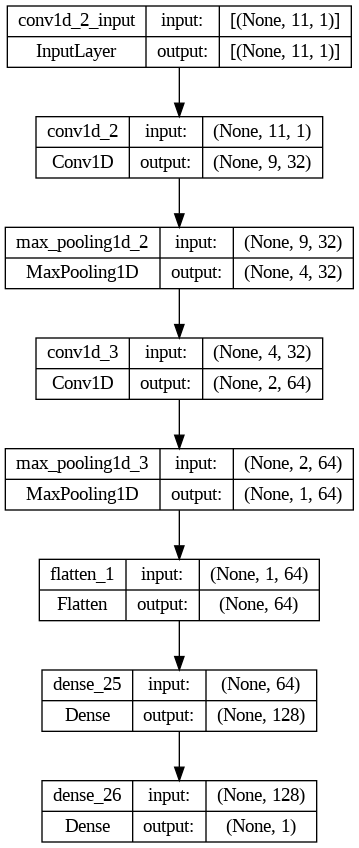

In [132]:
# Plot the model graph
plot_model(CNN_model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

In [133]:
# Compile the model
CNN_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [134]:
# Train the model
History_of_CNN=CNN_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
747/747 [==============================] - 4s 4ms/step - loss: 0.6513 - accuracy: 0.6215 - val_loss: 0.6216 - val_accuracy: 0.6669
Epoch 2/100
747/747 [==============================] - 3s 4ms/step - loss: 0.6048 - accuracy: 0.6734 - val_loss: 0.5931 - val_accuracy: 0.6974
Epoch 3/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5828 - accuracy: 0.6932 - val_loss: 0.5757 - val_accuracy: 0.7088
Epoch 4/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5695 - accuracy: 0.7062 - val_loss: 0.5647 - val_accuracy: 0.7185
Epoch 5/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5606 - accuracy: 0.7142 - val_loss: 0.5592 - val_accuracy: 0.7196
Epoch 6/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5543 - accuracy: 0.7195 - val_loss: 0.5512 - val_accuracy: 0.7263
Epoch 7/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5483 - accuracy: 0.7232 - val_loss: 0.5451 - val_accuracy: 0.7340

In [135]:
# Evaluate the model on the test data
CNN_Pred_Prob = CNN_model.predict(X_test)
CNN_Pred = (CNN_Pred_Prob > 0.5).astype(int)
CNN_Accuracy = accuracy_score(y_test, CNN_Pred)

234/234 [==============================] - 0s 2ms/step


In [136]:
print(f"Accuracy: {CNN_Accuracy:.3f}")

Accuracy: 0.762


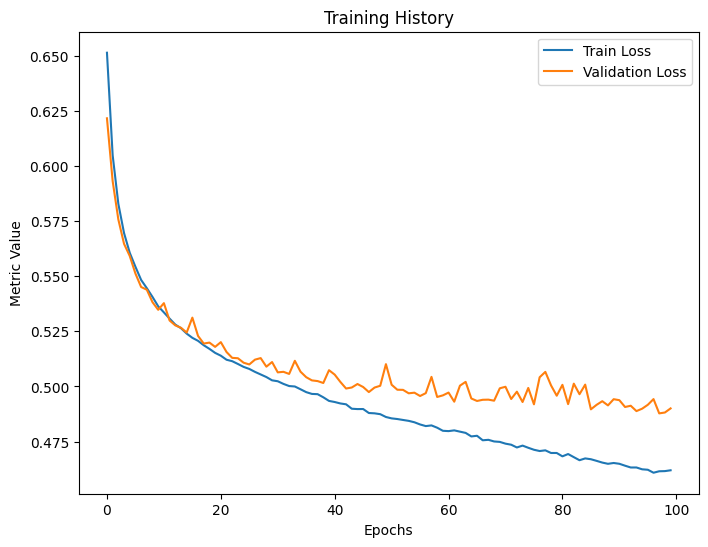

In [167]:
# Plot the training history
plt.figure(figsize=(8, 6))
plt.plot(History_of_CNN.history['loss'], label='Train Loss')
plt.plot(History_of_CNN.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.legend()
plt.title('Training History')
plt.show()

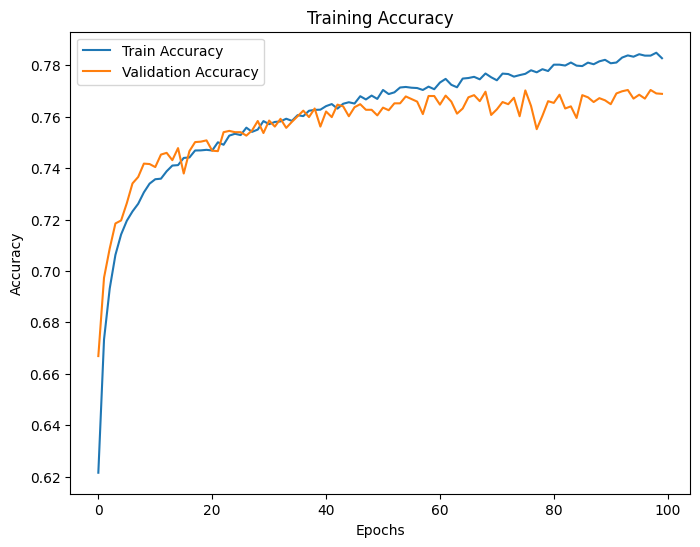

In [168]:
# Plot the accuracy during training
plt.figure(figsize=(8, 6))
plt.plot(History_of_CNN.history['accuracy'], label='Train Accuracy')
plt.plot(History_of_CNN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy')
plt.show()

In [169]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [170]:
# Define the wide input as a feature-crossed version of categorical features or one-hot-encoded features
# You can use other feature engineering techniques as well depending on your data
wide_input = tf.keras.layers.Input(shape=(X_train.shape[1],), name='wide_input')

# Define the deep input
deep_input = tf.keras.layers.Input(shape=(X_train.shape[1],), name='deep_input')

# Create the wide part (linear model)
wide_output = tf.keras.layers.Dense(1, activation='sigmoid', name='wide_output')(wide_input)

# Create the deep part (deep neural network)
deep_output = tf.keras.layers.Dense(32, activation='relu')(deep_input)
deep_output = tf.keras.layers.Dense(16, activation='relu')(deep_output)
deep_output = tf.keras.layers.Dense(1, activation='sigmoid', name='deep_output')(deep_output)

# Concatenate the outputs of the wide and deep parts
combined_output = tf.keras.layers.concatenate([wide_output, deep_output])

In [171]:
# Create the final model
Wide_model = tf.keras.Model(inputs=[wide_input, deep_input], outputs=combined_output)

# Compile the model
Wide_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
Wide_History = Wide_model.fit([X_train, X_train], y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
747/747 [==============================] - 5s 4ms/step - loss: 0.5964 - accuracy: 0.5967 - val_loss: 0.5545 - val_accuracy: 0.6354
Epoch 2/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5543 - accuracy: 0.6193 - val_loss: 0.5438 - val_accuracy: 0.6014
Epoch 3/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5484 - accuracy: 0.6131 - val_loss: 0.5412 - val_accuracy: 0.6007
Epoch 4/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5456 - accuracy: 0.6154 - val_loss: 0.5404 - val_accuracy: 0.6300
Epoch 5/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5436 - accuracy: 0.6233 - val_loss: 0.5376 - val_accuracy: 0.6155
Epoch 6/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5422 - accuracy: 0.6276 - val_loss: 0.5372 - val_accuracy: 0.6143
Epoch 7/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5406 - accuracy: 0.6299 - val_loss: 0.5353 - val_accuracy: 0.6249

In [172]:
# Evaluate the model on the test set
wide_test_loss, wide_test_accuracy = Wide_model.evaluate([X_test, X_test], y_test)

234/234 [==============================] - 1s 2ms/step - loss: 0.5295 - accuracy: 0.6791


In [173]:
print(f"Test Loss: {wide_test_loss:.4f}, Test Accuracy: {wide_test_accuracy:.4f}")

Test Loss: 0.5295, Test Accuracy: 0.6791


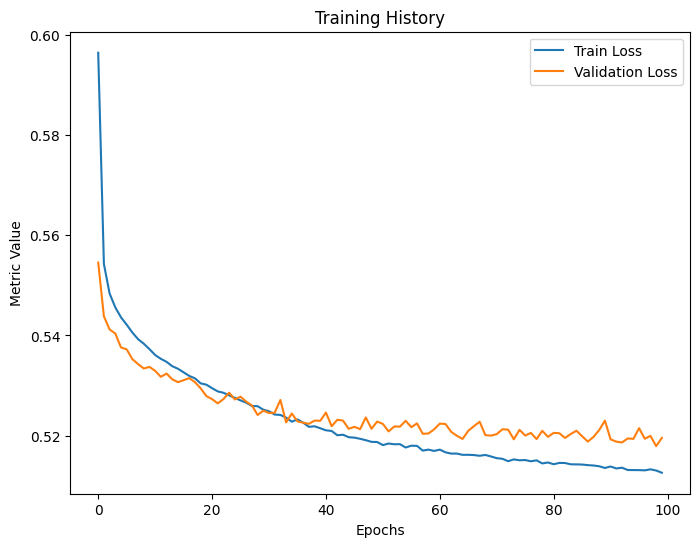

In [174]:
# Plot the training history
plt.figure(figsize=(8, 6))
plt.plot(Wide_History.history['loss'], label='Train Loss')
plt.plot(Wide_History.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.legend()
plt.title('Training History')
plt.show()

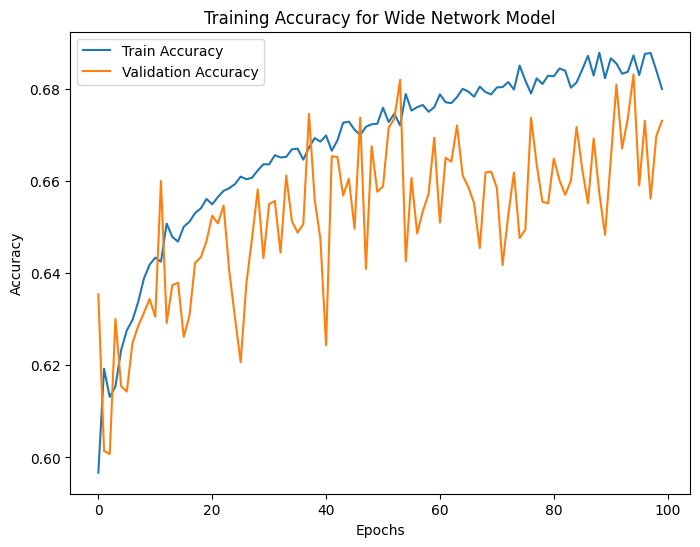

In [175]:
# Plot the accuracy during training
plt.figure(figsize=(8, 6))
plt.plot(Wide_History.history['accuracy'], label='Train Accuracy')
plt.plot(Wide_History.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy for Wide Network Model')
plt.show()

In [150]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [151]:
# Create the autoencoder model using Keras (TensorFlow)
input_dim = X_train.shape[1]

# Encoder part of the autoencoder
encoder = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(16, activation='relu')
])

# Decoder part of the autoencoder
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(16,)),
    tf.keras.layers.Dense(input_dim, activation='linear')
])

# Combine encoder and decoder to form the autoencoder model
autoencoder = tf.keras.Sequential([
    encoder,
    decoder
])

In [152]:
# Use the encoder to extract features from the data
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

234/234 [==============================] - 0s 1ms/step


In [153]:
# Create the binary classification model using the encoded features
Autoen_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(16,)),  # 16 is the size of the encoded features
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the binary classification model
Autoen_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the binary classification model using the encoded features
Auto_Encode_History = Autoen_model.fit(X_train_encoded, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
747/747 [==============================] - 4s 4ms/step - loss: 0.6212 - accuracy: 0.6474 - val_loss: 0.5984 - val_accuracy: 0.6771
Epoch 2/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5933 - accuracy: 0.6849 - val_loss: 0.5886 - val_accuracy: 0.6875
Epoch 3/100
747/747 [==============================] - 3s 3ms/step - loss: 0.5882 - accuracy: 0.6843 - val_loss: 0.5886 - val_accuracy: 0.6937
Epoch 4/100
747/747 [==============================] - 3s 3ms/step - loss: 0.5849 - accuracy: 0.6883 - val_loss: 0.5854 - val_accuracy: 0.6945
Epoch 5/100
747/747 [==============================] - 3s 3ms/step - loss: 0.5818 - accuracy: 0.6874 - val_loss: 0.5846 - val_accuracy: 0.6957
Epoch 6/100
747/747 [==============================] - 3s 3ms/step - loss: 0.5793 - accuracy: 0.6923 - val_loss: 0.5817 - val_accuracy: 0.6994
Epoch 7/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5769 - accuracy: 0.6939 - val_loss: 0.5792 - val_accuracy: 0.6992

In [154]:
# Evaluate the binary classification model on the test set
test_loss, test_accuracy = Autoen_model.evaluate(X_test_encoded, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

234/234 [==============================] - 0s 2ms/step - loss: 0.5594 - accuracy: 0.7178
Test Loss: 0.5594, Test Accuracy: 0.7178


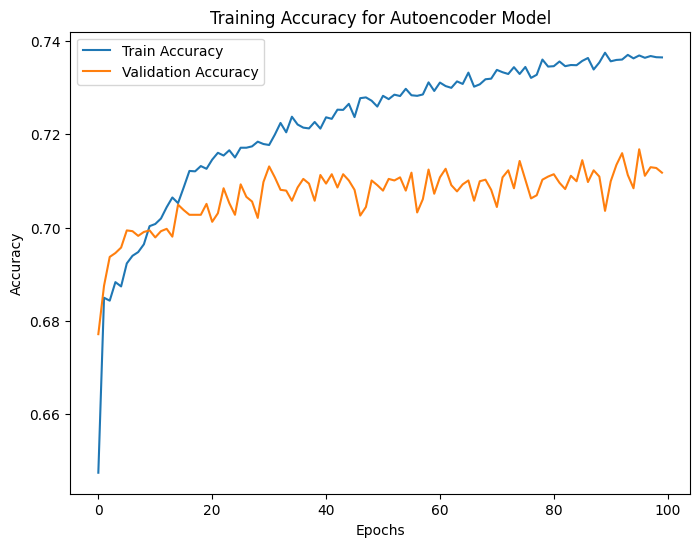

In [155]:
# Plot the accuracy during training
plt.figure(figsize=(8, 6))
plt.plot(Auto_Encode_History.history['accuracy'], label='Train Accuracy')
plt.plot(Auto_Encode_History.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy for Autoencoder Model')
plt.show()

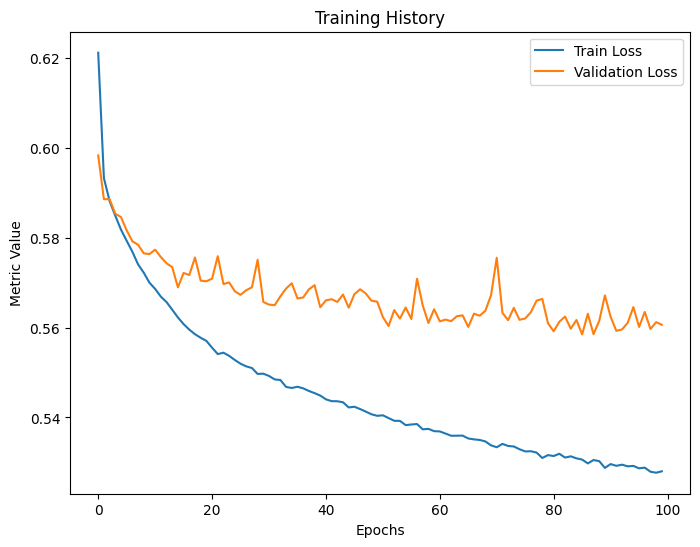

In [156]:
# Plot the training history
plt.figure(figsize=(8, 6))
plt.plot(Auto_Encode_History.history['loss'], label='Train Loss')
plt.plot(Auto_Encode_History.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.legend()
plt.title('Training History')
plt.show()

In [176]:
# Number of individual models in the ensemble
num_models = 3

# Create and train individual models
individual_models = [CNN_model,Wide_model,autoencoder]
for i in range(num_models):
    Ensemble_model_deep = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
    ])
    Ensemble_model_deep.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    Ensemble_model_deep.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
    individual_models.append(Ensemble_model_deep)

Epoch 1/100
747/747 [==============================] - 4s 3ms/step - loss: 0.5763 - accuracy: 0.6959 - val_loss: 0.5435 - val_accuracy: 0.7305
Epoch 2/100
747/747 [==============================] - 3s 3ms/step - loss: 0.5442 - accuracy: 0.7302 - val_loss: 0.5328 - val_accuracy: 0.7426
Epoch 3/100
747/747 [==============================] - 3s 4ms/step - loss: 0.5344 - accuracy: 0.7352 - val_loss: 0.5231 - val_accuracy: 0.7520
Epoch 4/100
747/747 [==============================] - 2s 3ms/step - loss: 0.5270 - accuracy: 0.7400 - val_loss: 0.5195 - val_accuracy: 0.7531
Epoch 5/100
747/747 [==============================] - 3s 3ms/step - loss: 0.5227 - accuracy: 0.7416 - val_loss: 0.5160 - val_accuracy: 0.7546
Epoch 6/100
747/747 [==============================] - 2s 3ms/step - loss: 0.5196 - accuracy: 0.7433 - val_loss: 0.5122 - val_accuracy: 0.7575
Epoch 7/100
747/747 [==============================] - 3s 3ms/step - loss: 0.5162 - accuracy: 0.7467 - val_loss: 0.5120 - val_accuracy: 0.7583

In [177]:
# Make predictions using all individual models
all_predictions = np.array([Ensemble_model_deep.predict(X_test) for model in individual_models])

# Average predictions to get the final ensemble prediction
ensemble_prediction = np.mean(all_predictions, axis=0)

# Convert probabilities to binary predictions (0 or 1)
final_predictions = (ensemble_prediction > 0.5).astype(int)

234/234 [==============================] - 0s 1ms/step


In [178]:
# Calculate the ensemble accuracy by comparing element-wise values
ensemble_accuracy = accuracy_score(final_predictions, y_test)
print(f"Ensemble Test Accuracy: {ensemble_accuracy:.4f}")

Ensemble Test Accuracy: 0.7639
